# Project Vis 1: Global Access to Safely Managed Drinking Water

## Goal
This visualization shows the percentage of population with access to safely managed drinking water by country, using the most recent data available for SDG Indicator 6.1.1.

## Data Source
- Source: World Bank – Indicator SH.H2O.SMDW.ZS
- Link: https://data.worldbank.org/indicator/SH.H2O.SMDW.ZS
- File: API_SH.H2O.SMDW.ZS_DS2_en_csv_v2_19500.csv

## 1. Load the Dataset

We are using a CSV file downloaded from the World Bank that contains data for SDG Indicator 6.1.1 (safely managed drinking water services).  
The first few rows in the file include metadata (descriptions and notes), so we skip them to read only the actual data table.

In [13]:
import pandas as pd
import plotly.express as px

# Load the CSV
df = pd.read_csv("API_SH.H2O.SMDW.ZS_DS2_en_csv_v2_19500.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,People using safely managed drinking water ser...,SH.H2O.SMDW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,People using safely managed drinking water ser...,SH.H2O.SMDW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,People using safely managed drinking water ser...,SH.H2O.SMDW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.762220,25.671417,26.581315,27.491734,28.402505,29.313843,30.034098,NaN,NaN,NaN
3,Africa Western and Central,AFW,People using safely managed drinking water ser...,SH.H2O.SMDW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.939665,26.670709,27.392798,28.113864,28.810001,29.321655,29.517207,NaN,NaN,NaN
4,Angola,AGO,People using safely managed drinking water ser...,SH.H2O.SMDW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Cleaning and Preparing the Data
We'll keep only the most recent year (2022) and drop rows with missing values.

In [16]:
df_clean = df[['Country Name', '2022']].dropna()
df_clean.columns = ['Country', 'Access (%)']
df_clean.head()

,Country,Access (%)
2,Afghanistan,30.034098
3,Africa Western and Central,29.517207
5,Albania,70.736068
6,Andorra,90.640001
10,Armenia,82.411724


## 3. Visual: Map of Drinking Water Access
We'll use Plotly Express to create an interactive world map showing access to safely managed drinking water.

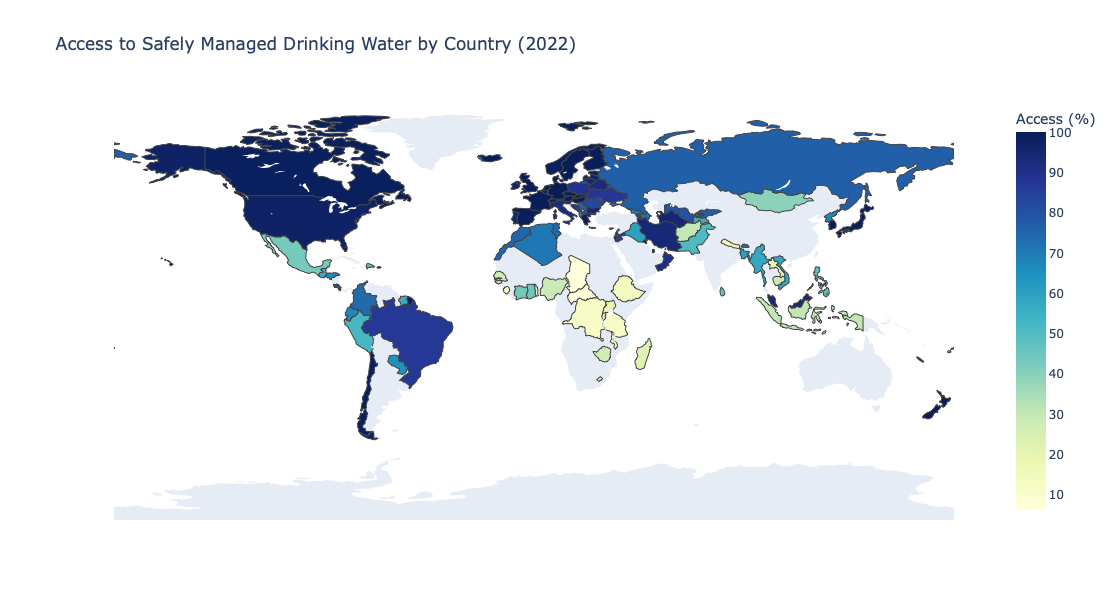

In [23]:
fig = px.choropleth(df_clean,
                    locations='Country',
                    locationmode='country names',
                    color='Access (%)',
                    color_continuous_scale='YlGnBu',
                    title='Access to Safely Managed Drinking Water by Country (2022)')

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    width=1000,
    height=600
)

fig.show()

## 4. Explanation

This map shows that access to safely managed drinking water is high in most developed countries (90%+), while many countries in Sub-Saharan Africa and parts of Asia have lower access with some below 50%. This shows that clean water is not equal around the world.